In [2]:
import matplotlib.pyplot as plt
import numpy as np
from _FigureJiazeHelper import *
from matplotlib import cm
from _CommunityDetect import *
from _DetectabilityWithMeta import *

%load_ext autoreload
%autoreload 2

In [3]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=16)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 20  # 'large'
plt.rcParams['lines.markersize'] = 12

# %matplotlib notebook
%config InlineBackend.figure_format = 'retina'

Metadata generation done!
pin=0.025, pout=0 border 7.127550223329918 Kpos 6 Kneg 0
[[-2.33505229e-14 -1.07182035e+00 -2.14359274e+00 -3.21525533e+00
  -4.28675173e+00 -5.35803035e+00 -6.42904393e+00 -7.49974905e+00
  -8.57010579e+00 -9.64007734e+00]
 [ 7.74194734e-15 -1.06749177e+00 -2.13494462e+00 -3.20229604e+00
  -4.26948900e+00 -5.33647134e+00 -6.40319526e+00 -7.46961686e+00
  -8.53569575e+00 -9.60139471e+00]
 [ 7.90599364e-15 -1.06291184e+00 -2.12573857e+00 -3.18842123e+00
  -4.25090602e+00 -5.31314368e+00 -6.37508907e+00 -7.43670071e+00
  -8.49794040e+00 -9.55877292e+00]
 [ 1.24218416e-14 -1.06220735e+00 -2.12438389e+00 -3.18646601e+00
  -4.24839573e+00 -5.31012008e+00 -6.37159057e+00 -7.43276270e+00
  -8.49359556e+00 -9.55405145e+00]
 [ 1.74659959e-14 -1.06031457e+00 -2.12054825e+00 -3.18064041e+00
  -4.24053585e+00 -5.30018414e+00 -6.35953913e+00 -7.41855850e+00
  -8.47720336e+00 -9.53543788e+00]
 [ 2.55545771e-14 -1.05432432e+00 -2.10862887e+00 -3.16284913e+00
  -4.21692630e+0

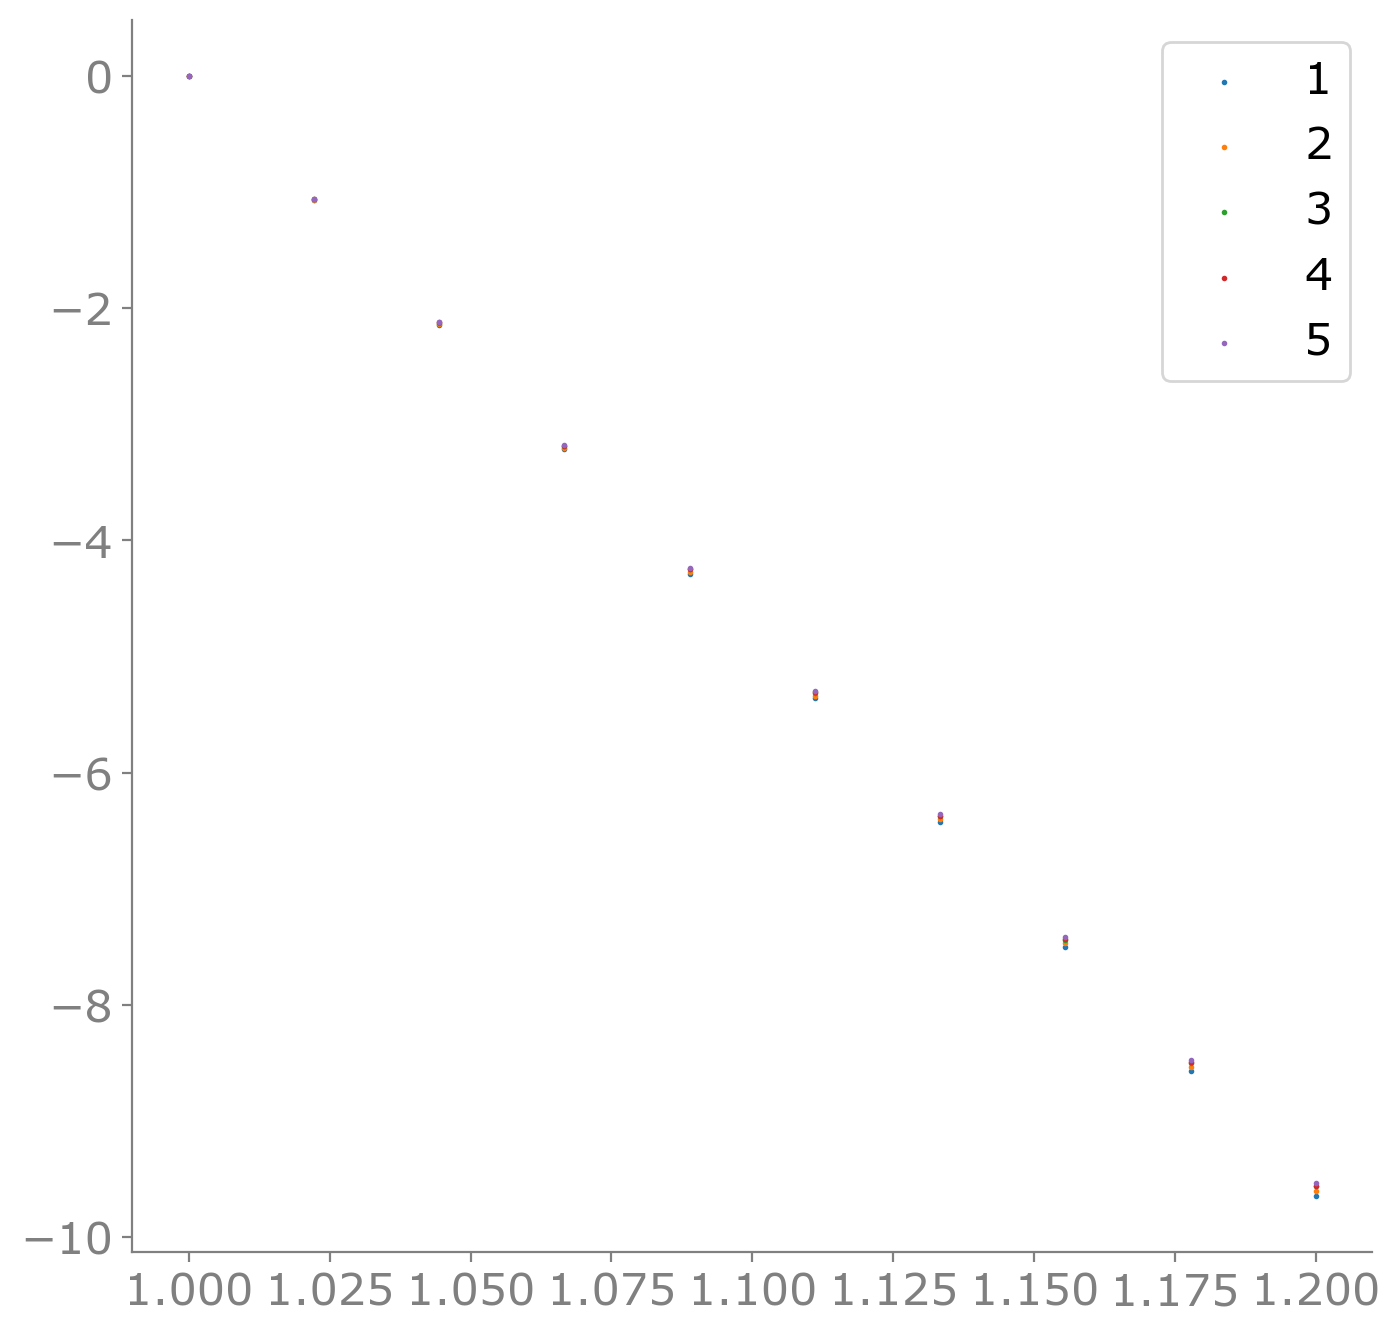

In [10]:
# Debug for DCBH
X = 2
Z = 3
n = X * Z * 2000
d = 50
rho = 0
delta = 0.025
pin = d / n + delta * (1 - 1 / (X * Z))
pout = d / n - delta / (X * Z)
pin = 0 if pin < 1e-10 else pin
pout = 0 if pout < 1e-10 else pout
msbm = SymMetaSBM(n, X, Z, rho, pin, pout)
A = msbm.sample()
BHa_pos = BetheHessian(A, regularizer='BHa')
BHa_neg = BetheHessian(A, regularizer='BHan')
Kpos = BHa_pos.find_negative_eigenvectors()
Kneg = BHa_neg.find_negative_eigenvectors()
d = A.sum(axis=1).flatten().astype(float)
rho = np.sum(d * d) / np.sum(d)
border = np.sqrt(rho)
print(f'pin={pin}, pout={pout}', "border", border, "Kpos", Kpos, "Kneg", Kneg)

rs = np.linspace(1, 1.2, 10)
evals = np.zeros((Kpos, np.size(rs)))
i = 0
for r in rs:
    BHa = BetheHessian(A, r=r, regularizer='BHa')
    BHa.find_k_eigenvectors(Kpos)
    evals[:, i] = BHa.evals
    i += 1
print(evals)
fig = plt.figure(figsize=(8, 8))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
for p in range(1, Kpos):
    plt.scatter(rs, evals[p-1, :], s=1, label=str(p))
plt.legend()

# EXP for n=12000 DC

In [4]:
# For big n
X = 2
Z = 3
n = X*Z*2000
d = 50
Withsnr = True
givenNumGroup = False
DC = True
fileId = 'amiExp5.25' + f'_n={n}_X={X}_Z={Z}_d={round(d)}_{"snr" if Withsnr else ""}_{"givenNumGroup" if givenNumGroup else ""}_{"DC" if DC else ""}'
load_path = "./result/detectabilityWithMeta/" + fileId + ".txt"
plot_rhos, plot_zs, full_ami, sub_ami, snr_nm, snr_m, full_num_group, sub_num_group, _, _, _, _ = read_exp(load_path=load_path, Withsnr=Withsnr)
print(f'min={np.min(full_ami)}, max={np.max(full_ami)}')
print(f'min delta={np.min(plot_zs)}, max delta={np.max(plot_zs)}')
# save_path = "./_Figure/AMI_fullgraph_d_" + str(d) + ".png"
print(np.unique(plot_zs))
selfplot(plot_rhos, plot_zs, full_ami, sub_ami, snr_nm, snr_m, full_num_group, sub_num_group)
# save_path = "./_Figure/" + fileId + ".png"
# plt.tight_layout()
# plt.savefig(save_path, dpi=600)

NameError: name 'read_exp' is not defined